In [253]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
!pip install webdriver-manager



In [282]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period = 'max')
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [357]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text content of the webpage as a variable named html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")
html_data

Webpage downloaded successfully.


'\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\n\t\t<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    \n\t\t\t\t\n\t\t\t\t&lt;ul style=\'margin-top:10p

In [316]:
gme1 = yf.Ticker('GME')
gme1_data = gme1.history(period = 'max')
gme1_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [341]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Récupérer le contenu HTML de la page
response = requests.get(url)
html_content = response.text

# Analyser le contenu avec BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Identifier le premier tableau contenant les revenus
tables = soup.find_all("table")
revenue_table = tables[0]  # Le premier tableau semble être celui des revenus

# Extraire les données du tableau
rows = revenue_table.find_all("tr")
data = []
for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:  # Ignorer les lignes sans données
        data.append(cols)

# Convertir en DataFrame
df = pd.DataFrame(data, columns=["Year", "Revenue"])

# Afficher les 5 premières lignes (bien que nous n'ayons que 2 lignes de données)df.head(5)
df.head()

,Year,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [312]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Récupérer le contenu HTML de la page
response = requests.get(url)
html_content = response.text

# Analyser le contenu avec BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Chercher le tableau contenant les revenus de Tesla
tables = soup.find_all("table")

# Identifier le tableau avec les revenus (Tesla)
tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break

# Extraire les données du tableau
if tesla_revenue_table:
    rows = tesla_revenue_table.find_all("tr")
    data = []
    for row in rows:
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        if cols:  # Ignorer les lignes sans données
            data.append(cols)

    # Convertir les données en DataFrame Pandas
    df = pd.DataFrame(data, columns=["Date", "Revenue"])
    
    # Nettoyer les données : Suppression des revenus "N/A" ou vides
    df = df[df["Revenue"].str.contains("\d", na=False)]
    
    # Utiliser la fonction tail pour obtenir les dernières lignes
    last_rows = df.tail(5)
    
    # Afficher les dernières lignes
    
else:
    print("Tableau des revenus Tesla introuvable.")
last_rows

<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
/var/folders/x5/lqylcjlx37596wcsr1ggk3fm0000gn/T/ipykernel_73387/4253944999.py:39: SyntaxWarning: invalid escape sequence '\d'
  df = df[df["Revenue"].str.contains("\d", na=False)]


,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


In [349]:
for row in rows_tesla:

SyntaxError: incomplete input (2961494671.py, line 1)

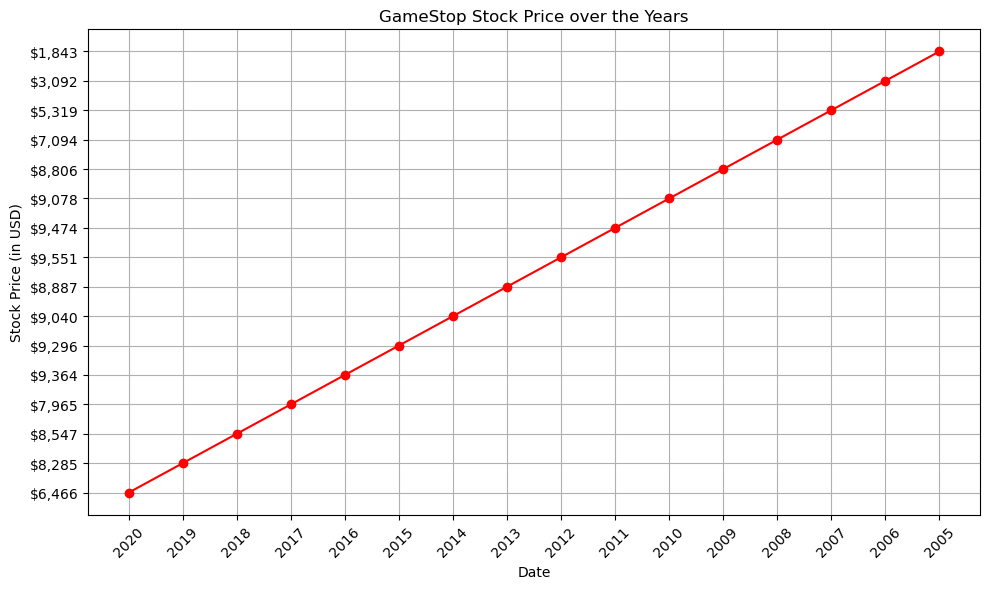

In [353]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Exemple de la fonction make_graph
def make_graph(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df["Date"], df["Stock Price"], marker='o', color='r')  # Utilisation de "Date" et "Stock Price"
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (in USD)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# URL de GameStop
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_gme = requests.get(url_gme)
html_content_gme = response_gme.text
soup_gme = BeautifulSoup(html_content_gme, "html.parser")
tables_gme = soup_gme.find_all("table")
gme_table = tables_gme[0]
rows_gme = gme_table.find_all("tr")

data_gme = []
for row in rows_gme:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:
        data_gme.append(cols)

df_gme = pd.DataFrame(data_gme, columns=["Date", "Stock Price"])

# Utilisation de make_graph pour afficher le graphique GameStop
make_graph(df_gme, "GameStop Stock Price over the Years")


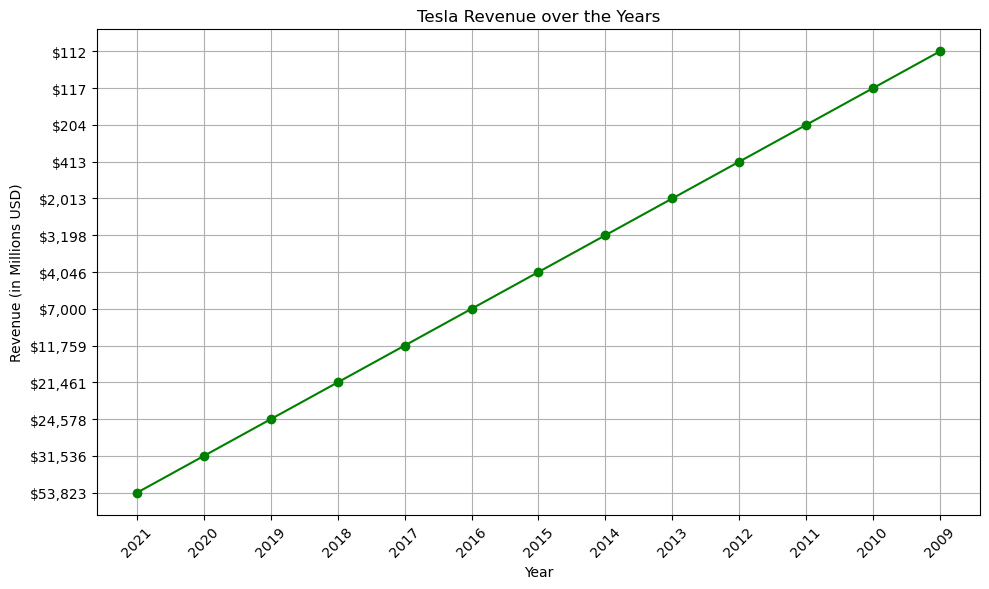

In [359]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Exemple de la fonction make_graph
def make_graph(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df["Year"], df["Revenue"], marker='o', color='g')  # Utilisation de "Year" et "Revenue" pour Tesla
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Revenue (in Millions USD)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# URL de Tesla
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response_tesla = requests.get(url_tesla)
html_content_tesla = response_tesla.text
soup_tesla = BeautifulSoup(html_content_tesla, "html.parser")
tables_tesla = soup_tesla.find_all("table")
tesla_table = tables_tesla[0]
rows_tesla = tesla_table.find_all("tr")

data_tesla = []
for row in rows_tesla:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:
        data_tesla.append(cols)

df_tesla = pd.DataFrame(data_tesla, columns=["Year", "Revenue"])

# Utilisation de make_graph pour afficher le graphique Tesla
make_graph(df_tesla, "Tesla Revenue over the Years")
